#Laboratorio Práctico: Procesamiento de Imágenes
**Tiempo estimado:** 50 minutos

**Objetivos:** Al finalizar este laboratorio, vas a poder aplicar conceptos fundamentales de manipulación, análisis y segmentación de imágenes utilizando las librerías `OpenCV` y `scikit-image`     

In [5]:
# Importación de las librerías necesarias para el laboratorio
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
import skimage as ski
from skimage import filters, feature, exposure
from PIL import Image
import urllib.request

##Parte 0: Preparación del Entorno (5 minutos)

Primero, vamos a descargar las imágenes que vamos a usar en los ejercicios. Con estos comandos, las guardamos en el entorno de ejecución del notebook.

- `texto.png:` Una imagen con texto, ideal para el análisis de bordes.

- `paisaje.jpg:` Una imagen a color para la manipulación de canales.

- `monedas.jpg:` Una imagen de monedas sobre un fondo, perfecta para segmentación.

In [12]:
import urllib.request
import urllib.error

def download_image_from_pexels():
    # For Pexels, you need to use the direct image URL, not the download page URL
    # This is a direct link to a landscape image from Pexels
    url = "https://images.pexels.com/photos/417074/pexels-photo-417074.jpeg"
    ruta_destino = "paisaje.jpg"  # Changed to .jpg since it's a JPEG image
    
    try:
        print("🔄 Descargando imagen...")
        
        # Add headers to avoid being blocked
        req = urllib.request.Request(url)
        req.add_header('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36')
        
        with urllib.request.urlopen(req) as response:
            with open(ruta_destino, 'wb') as file:
                file.write(response.read())
        
        print("📁 Imagen descargada correctamente:", ruta_destino)
        
        # Verify the file was downloaded and has content
        import os
        if os.path.exists(ruta_destino):
            file_size = os.path.getsize(ruta_destino)
            print(f"📊 Tamaño del archivo: {file_size} bytes")
        
    except urllib.error.HTTPError as e:
        print(f"❌ Error HTTP al descargar la imagen: {e.code} - {e.reason}")
    except urllib.error.URLError as e:
        print(f"❌ Error de URL: {e}")
    except Exception as e:
        print(f"❌ Error inesperado: {e}")

if __name__ == "__main__":
    download_image_from_pexels()

🔄 Descargando imagen...
📁 Imagen descargada correctamente: paisaje.jpg
📊 Tamaño del archivo: 1275751 bytes


In [2]:
# Descarga de las imágenes de trabajo
!wget -q https://lh3.googleusercontent.com/proxy/0Lf8l5VqGTH-Xv7EWfMiY-l4EVxRzuYYtAN9GI_eXCuioGp0K2BsrXo38WAMRjJR3aNB-602vjmichZ9dpN7rcoiNtpRSyIIakM -O texto.png
!wget -q https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/124084.jpg -O paisaje.jpg
!wget -q https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg -O monedas.jpg

print("Imágenes descargadas correctamente.")

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Imágenes descargadas correctamente.


"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
# Función auxiliar que vamos a usar durante todo el laboratorio
def mostrar_imagenes(imagenes, titulos, cmap='gray', figsize=(12, 4)):
    """
    Función auxiliar para visualizar una o más imágenes en una misma fila.
    """
    n = len(imagenes)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes] # Hacemos que sea iterable si es una sola imagen
    for ax, img, titulo in zip(axes, imagenes, titulos):
        # Usamos el mapa de color 'cmap' solo si la imagen es en escala de grises
        ax.imshow(img, cmap=cmap if len(img.shape) == 2 else None)
        ax.set_title(titulo)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

###Ejercicio 1: Análisis y Manipulación Básica (10 minutos)

Empezamos con lo fundamental: cargar una imagen y entender su estructura.

Tareas:

- Cargá la imagen `paisaje.jpg` usando OpenCV.

- Implementá una función que analice y muestre sus propiedades principales.

- Extraé y visualizá cada canal de color (Azul, Verde, Rojo) por separado.

- Convertí la imagen del formato BGR (propio de OpenCV) a RGB y comparala con la original.

In [13]:
import cv2
import matplotlib.pyplot as plt

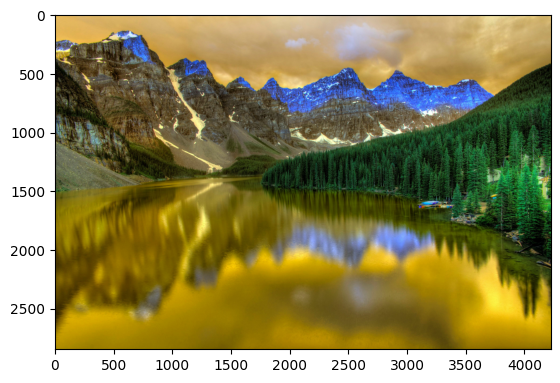

📐 DIMENSIONES:
   Alto: 2847 píxeles
   Ancho: 4226 píxeles
   Canales: 3 (imagen en color)
   Tipo de datos: uint8

🔢 CANTIDAD DE PÍXELES:
   Total de píxeles: 12,031,422

💾 TIPO DE DATOS:
   Tipo: uint8

🔢 CANTIDAD DE PÍXELES:
   Total de píxeles: 12,031,422
   Total de valores (píxeles × canales): 36,094,266

📊 VALORES DE INTENSIDAD:
   Azul (B):
     Mínimo: 0
     Máximo: 255
     Media: 121.00
   Verde (G):
     Mínimo: 0
     Máximo: 255
     Media: 111.24
   Rojo (R):
     Mínimo: 0
     Máximo: 255
     Media: 51.30

   🌍 VALORES GLOBALES (toda la imagen):
     Mínimo: 0
     Máximo: 255
     Media: 94.51


In [29]:
# 1.1: Cargá la imagen 'paisaje.jpg'
info = {}
X = cv2.imread('paisaje.jpg')

# Mostrar imagen en Jupyter/VS Code
plt.imshow(X)
plt.show()


#Dimensiones (alto x ancho x canales
print("📐 DIMENSIONES:")
info['dimensiones'] = X.shape
print(f"   Alto: {X.shape[0]} píxeles")
print(f"   Ancho: {X.shape[1]} píxeles")

if len(X.shape) == 3:
    print(f"   Canales: {X.shape[2]} (imagen en color)")
    info['canales'] = X.shape[2]
    info['es_color'] = True
else:
    print("   Canales: 1 (imagen en escala de grises)")
    info['canales'] = 1
    info['es_color'] = False

# Tipo de datos de los píxeles (ej: uint8)
info['tipo_datos'] = X.dtype
print(f"   Tipo de datos: {X.dtype}")

# Valores de intensidad mínimo y máximo
print(f"\n🔢 CANTIDAD DE PÍXELES:")
total_pixeles = X.shape[0] * X.shape[1]
info['total_pixeles'] = total_pixeles
print(f"   Total de píxeles: {total_pixeles:,}")

# 2. TIPO DE DATOS DE LOS PÍXELES
print(f"\n💾 TIPO DE DATOS:")
info['tipo_datos'] = str(X.dtype)
print(f"   Tipo: {X.dtype}")

 # 3. CANTIDAD TOTAL DE PÍXELES
print(f"\n🔢 CANTIDAD DE PÍXELES:")
total_pixeles = X.shape[0] * X.shape[1]
info['total_pixeles'] = total_pixeles
print(f"   Total de píxeles: {total_pixeles:,}")

if info['es_color']:
        total_valores = total_pixeles * info['canales']
        info['total_valores'] = total_valores
        print(f"   Total de valores (píxeles × canales): {total_valores:,}")

# 4. VALORES DE INTENSIDAD MÍNIMO Y MÁXIMO
print(f"\n📊 VALORES DE INTENSIDAD:")

if info['es_color']:
    # Para imagen en color, analizar cada canal
    canales_nombres = ['Azul (B)', 'Verde (G)', 'Rojo (R)'] if info['canales'] == 3 else [f'Canal {i}' for i in range(info['canales'])]
    info['valores_por_canal'] = {}
        
    for i in range(info['canales']):
        canal = X[:, :, i]
        min_val = int(np.min(canal))
        max_val = int(np.max(canal))
        media_val = float(np.mean(canal))
            
        info['valores_por_canal'][i] = {
                'nombre': canales_nombres[i] if i < len(canales_nombres) else f'Canal {i}',
                'minimo': min_val,
                'maximo': max_val,
                'media': media_val
            }

    for i in range(info['canales']):
        print(f"   {canales_nombres[i] if i < len(canales_nombres) else f'Canal {i}'}:")
        print(f"     Mínimo: {info['valores_por_canal'][i]['minimo']}")
        print(f"     Máximo: {info['valores_por_canal'][i]['maximo']}")
        print(f"     Media: {info['valores_por_canal'][i]['media']:.2f}")

        # Valores globales de toda la imagen
        min_global = int(np.min(X))
        max_global = int(np.max(X))
        media_global = float(np.mean(X))
        
    else:
        # Para imagen en escala de grises
        min_global = int(np.min(X))
        max_global = int(np.max(X))
        media_global = float(np.mean(X))
    
    info['valores_globales'] = {
        'minimo': min_global,
        'maximo': max_global,
        'media': media_global
    }
    
    print(f"\n   🌍 VALORES GLOBALES (toda la imagen):")
    print(f"     Mínimo: {min_global}")
    print(f"     Máximo: {max_global}")
    print(f"     Media: {media_global:.2f}")

🎨 ANÁLISIS POR CANALES - Formato BGR de OpenCV

🔵 CANAL AZUL (B)


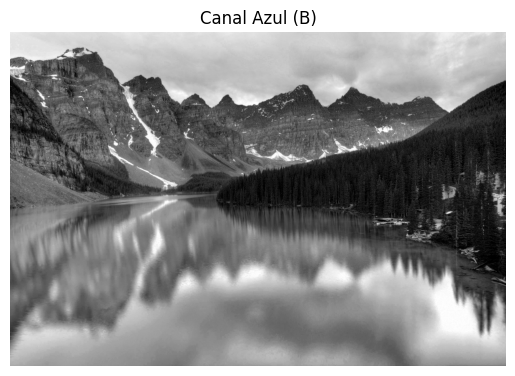


🟢 CANAL VERDE (G)


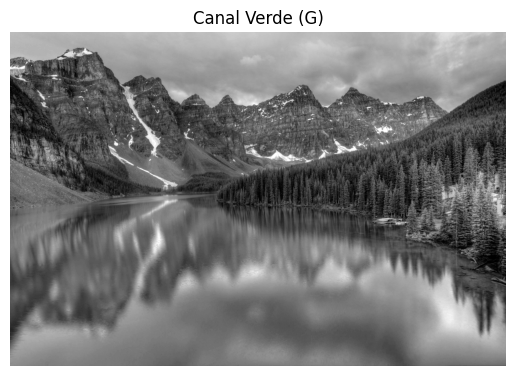


🔴 CANAL ROJO (R)


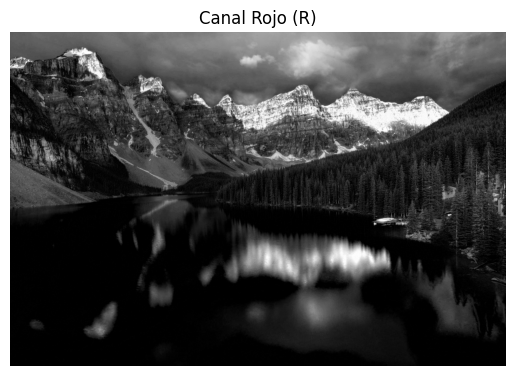

In [28]:
print("🎨 ANÁLISIS POR CANALES - Formato BGR de OpenCV")

# Canal Azul (Blue) - Índice 0
print("\n🔵 CANAL AZUL (B)")
B = X[:,:,0]
plt.imshow(B, cmap='gray')
plt.title("Canal Azul (B)")
plt.axis('off')
plt.show()

# Canal Verde (Green) - Índice 1
print("\n🟢 CANAL VERDE (G)")
G = X[:,:,1]
plt.imshow(G, cmap='gray')
plt.title("Canal Verde (G)")
plt.axis('off')
plt.show()

# Canal Rojo (Red) - Índice 2
print("\n🔴 CANAL ROJO (R)")
R = X[:,:,2]
plt.imshow(R, cmap='gray')
plt.title("Canal Rojo (R)")
plt.axis('off')
plt.show()

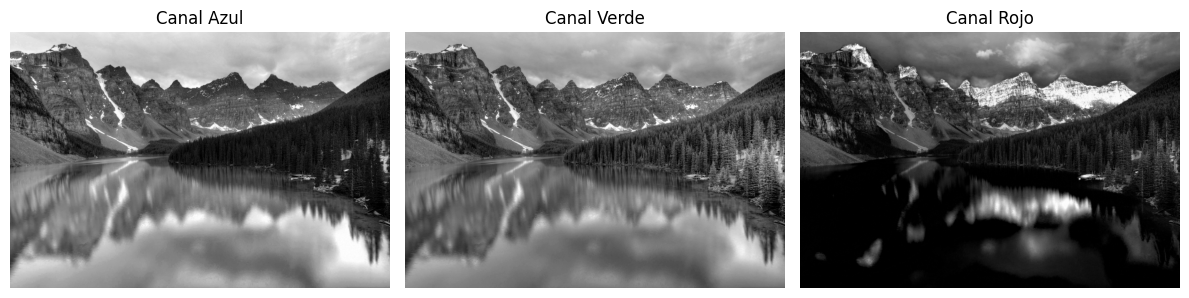

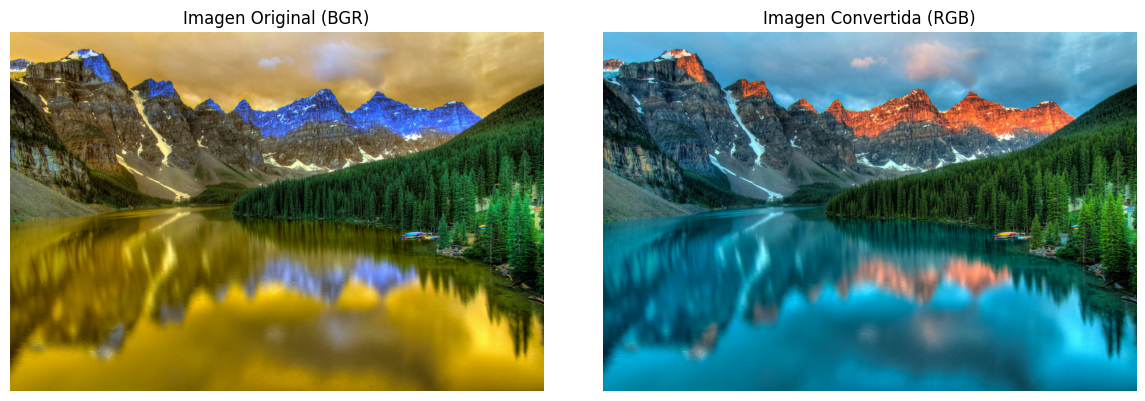

In [32]:
# Definir la función mostrar_imagenes
def mostrar_imagenes(imagenes, titulos, cmap='gray', figsize=(12, 4)):
    """
    Función auxiliar para visualizar una o más imágenes en una misma fila.
    """
    n = len(imagenes)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes] # Hacemos que sea iterable si es una sola imagen
    for ax, img, titulo in zip(axes, imagenes, titulos):
        # Usamos el mapa de color 'cmap' solo si la imagen es en escala de grises
        ax.imshow(img, cmap=cmap if len(img.shape) == 2 else None)
        ax.set_title(titulo)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 1.4: Completar las variables faltantes
info = {}
X = cv2.imread('paisaje.jpg')

# Extraer canales (recordar que OpenCV usa BGR)
canal_b = X[:,:,0]  # Canal Azul
canal_g = X[:,:,1]  # Canal Verde  
canal_r = X[:,:,2]  # Canal Rojo

# Convertir de BGR a RGB
img_paisaje = X  # Imagen original en BGR
img_rgb = cv2.cvtColor(X, cv2.COLOR_BGR2RGB)

# Visualizaciones
mostrar_imagenes([canal_b, canal_g, canal_r],
                 ['Canal Azul', 'Canal Verde', 'Canal Rojo'])
mostrar_imagenes([img_paisaje, img_rgb],
                 ['Imagen Original (BGR)', 'Imagen Convertida (RGB)'])


In [35]:
# --- Pregunta Conceptual ---
print("Pregunta Conceptual 1:")
print("¿Por qué la imagen se ve con colores extraños cuando se muestra")
print("directamente con matplotlib después de cargarla con OpenCV?")

Pregunta Conceptual 1:
¿Por qué la imagen se ve con colores extraños cuando se muestra
directamente con matplotlib después de cargarla con OpenCV?


In [34]:
print("Tu respuesta: La imagen se ve con colores extraños porque OpenCV carga las imágenes en formato BGR (Azul-Verde-Rojo), pero matplotlib espera que estén en formato RGB (Rojo-Verde-Azul). Esto causa que los canales azul y rojo se intercambien, mostrando colores incorrectos. La solución es convertir de BGR a RGB usando cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB) antes de mostrar con matplotlib.\n")

Tu respuesta: La imagen se ve con colores extraños porque OpenCV carga las imágenes en formato BGR (Azul-Verde-Rojo), pero matplotlib espera que estén en formato RGB (Rojo-Verde-Azul). Esto causa que los canales azul y rojo se intercambien, mostrando colores incorrectos. La solución es convertir de BGR a RGB usando cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB) antes de mostrar con matplotlib.



### Ejercicio 2: Transformaciones Geométricas (10 minutos)

Ahora vamos a manipular la geometría de la imagen.

Tareas:

- Recortá una "región de interés" (ROI) de 100x100 píxeles de la imagen del paisaje.

- Redimensioná ese recorte para que mida 200x200 píxeles.

- Creá un mosaico de 2x2 utilizando el recorte redimensionado.

- (Opcional) Aplicá una rotación de 45 grados al recorte original.

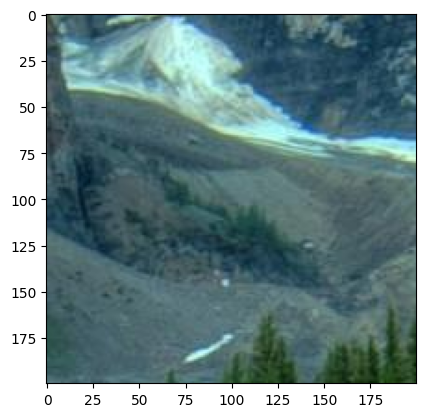

In [41]:
# Primero alto, despues ancho
img_roi = img_rgb[1000:1200, 2000:2200]
plt.imshow(img_roi)

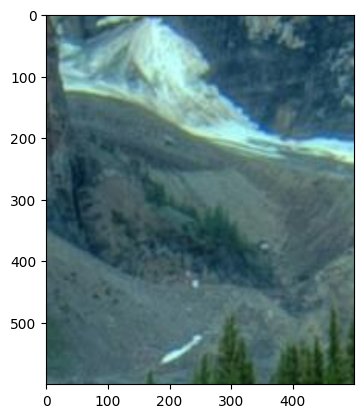

In [43]:
# 2.2: Redimensioná la ROI a 200x200
img_redimensionada = cv2.resize(img_roi, (500, 600))
plt.imshow(img_redimensionada)

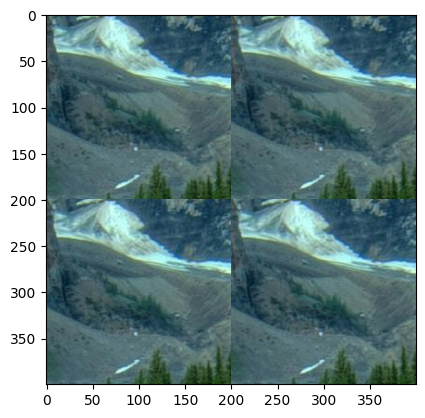

In [44]:
# 2.3: Creá un mosaico 2x2 con la ROI y la imagen redimensionada
vertical = np.vstack((img_roi, img_roi))
horizontal = np.hstack((vertical, vertical))
plt.imshow(horizontal)

In [46]:
# 1. Obtener la matriz de rotación
(h, w) = img_roi.shape[:2]
centro = (w // 2, h // 2)
angulo = 45
escala = 1.0

M = cv2.getRotationMatrix2D(centro, angulo, escala)

# 2. Aplicar la transformación
img_rotada = cv2.warpAffine(img_roi, M, (w, h))

# Mostrar la imagen rotada
cv2.imshow("Imagen Original", img_roi)
cv2.imshow("Imagen Rotada", img_rotada)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 2:")
print("¿Cuál es la diferencia principal entre recortar (crop) y redimensionar (resize)?")
print("¿En qué casos prácticos usarías cada operación?")


Pregunta Conceptual 2:
¿Cuál es la diferencia principal entre recortar (crop) y redimensionar (resize)?
¿En qué casos prácticos usarías cada operación?


In [51]:
print("""La diferencia principal es que recortar (crop) es un proceso de sustracción,
mientras que redimensionar (resize) es un proceso de transformación.

Recortar elimina píxeles de los bordes para quedarse con una porción de la imagen, sin cambiar el tamaño de los píxeles restantes. 
Por ejemplo, se usa para enfocar un objeto o eliminar elementos no deseados.

Redimensionar cambia el tamaño de la imagen completa, estirando o comprimiendo los píxeles para que se ajusten a las nuevas dimensiones. 
Se usa para ajustar la imagen a un formato específico, como subir una foto de perfil a una web.""")

La diferencia principal es que recortar (crop) es un proceso de sustracción,
mientras que redimensionar (resize) es un proceso de transformación.

Recortar elimina píxeles de los bordes para quedarse con una porción de la imagen, sin cambiar el tamaño de los píxeles restantes. 
Por ejemplo, se usa para enfocar un objeto o eliminar elementos no deseados.

Redimensionar cambia el tamaño de la imagen completa, estirando o comprimiendo los píxeles para que se ajusten a las nuevas dimensiones. 
Se usa para ajustar la imagen a un formato específico, como subir una foto de perfil a una web.


### Ejercicio 3: Detección de Bordes (OpenCV vs. Scikit-image) (10 minutos)

En este ejercicio, vamos a comparar dos de los algoritmos más populares para la detección de bordes.

Tareas:

- Cargá la imagen `texto.png` y convertila a escala de grises.

- Aplicá el detector de bordes Canny con OpenCV. Experimentá con distintos umbrales.

- Aplicá el detector de bordes Sobel con scikit-image.

- Compará visualmente los resultados de ambos métodos.

In [64]:
import urllib.request
import urllib.error

def download_image_from_pexels():
    # For Pexels, you need to use the direct image URL, not the download page URL
    # This is a direct link to a landscape image from Pexels
    url2 = "https://sanmartiniano.cultura.gob.ar/media/uploads/site-31/multimedia/san_martin_testamento_01_1.jpg"
    ruta_destino = "texto.jpg"  # Changed to .jpg since it's a JPEG image
    
    try:
        print("🔄 Descargando imagen...")
        
        # Add headers to avoid being blocked
        req = urllib.request.Request(url2)
        req.add_header('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36')
        
        with urllib.request.urlopen(req) as response:
            with open(ruta_destino, 'wb') as file:
                file.write(response.read())
        
        print("📁 Imagen descargada correctamente:", ruta_destino)
        
        # Verify the file was downloaded and has content
        import os
        if os.path.exists(ruta_destino):
            file_size = os.path.getsize(ruta_destino)
            print(f"📊 Tamaño del archivo: {file_size} bytes")
        
    except urllib.error.HTTPError as e:
        print(f"❌ Error HTTP al descargar la imagen: {e.code} - {e.reason}")
    except urllib.error.URLError as e:
        print(f"❌ Error de URL: {e}")
    except Exception as e:
        print(f"❌ Error inesperado: {e}")

if __name__ == "__main__":
    download_image_from_pexels()



🔄 Descargando imagen...
📁 Imagen descargada correctamente: texto.jpg
📊 Tamaño del archivo: 358804 bytes


In [65]:
# Cargar imagen y convertir a escala de grises
U = cv2.imread("texto.jpg", cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises



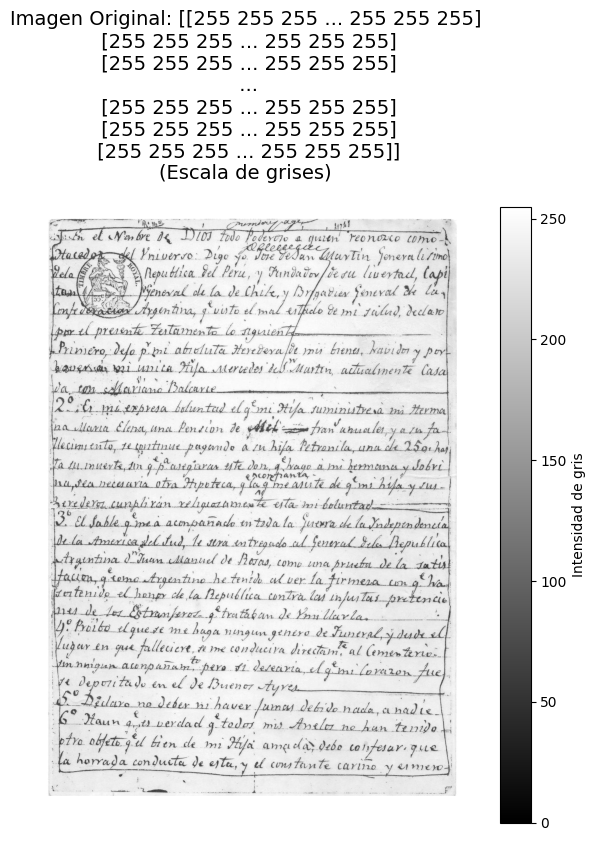

In [67]:
# Visualización inicial
plt.figure(figsize=(10, 8))
plt.imshow(U, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagen Original: {U}\n(Escala de grises)', fontsize=14, pad=20)
plt.colorbar(label='Intensidad de gris')
plt.axis('off')
plt.show()

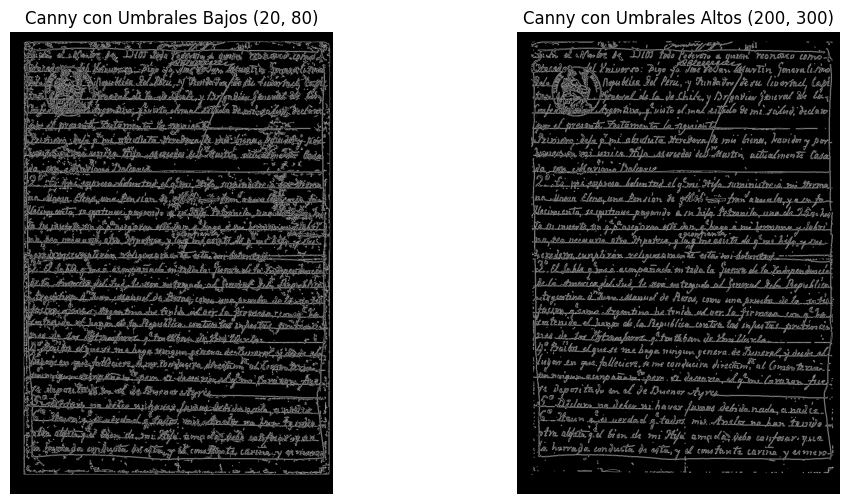

In [76]:
# Cargar la imagen en escala de grises (asegúrate de haberla cargado antes)
img_gray = U

# Umbrales bajos: más bordes, más ruido
bordes_canny_bajos = cv2.Canny(img_gray, 20, 80)

# Umbrales altos: menos bordes, más limpios
bordes_canny_altos = cv2.Canny(img_gray, 200, 300)

# Crear una figura para la visualización
plt.figure(figsize=(12, 6))

# Subplot 1: Umbrales bajos
plt.subplot(1, 2, 1)
plt.imshow(bordes_canny_bajos, cmap='gray')
plt.title('Canny con Umbrales Bajos (20, 80)')
plt.axis('off')

# Subplot 2: Umbrales altos
plt.subplot(1, 2, 2)
plt.imshow(bordes_canny_altos, cmap='gray')
plt.title('Canny con Umbrales Altos (200, 300)')
plt.axis('off')

# Mostrar la figura
plt.show()



In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 3
# --------------------------------------

# 3.1: Cargá 'texto.png' y convertila a escala de grises
# img_texto = imread('texto.png')
# img_gray = cv2.cvtColor(...)

# 3.2: Aplicá Canny con OpenCV
# Probá con diferentes umbrales, por ejemplo: (50, 150), (100, 200)
# bordes_canny = cv2.Canny(...)

# 3.3: Aplicá Sobel con scikit-image
# bordes_sobel = ski.filters.sobel(...)

# 3.4: Para una mejor comparación, aplicá también Canny con scikit-image
# Nota: scikit-image espera que los valores de la imagen estén entre 0 y 1.
# bordes_ski_canny = ski.feature.canny(img_gray / 255.0)

# Visualización sugerida:
# mostrar_imagenes([img_gray, bordes_canny, bordes_sobel, bordes_ski_canny],
#                  ['Original', 'Canny (OpenCV)', 'Sobel (Scikit)', 'Canny (Scikit)'])

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 3:")
print("¿Qué diferencias fundamentales observás entre los resultados de Canny y Sobel?")
print("¿Cuándo preferirías usar uno sobre el otro?")

In [ ]:
print("Tu respuesta: _______________________________________________\n")

## Ejercicio 4: Segmentación de Monedas (10 minutos)

La segmentación consiste en dividir una imagen en regiones significativas. La umbralización (thresholding) es una de las técnicas más simples para lograrlo.

Tareas:

- Cargá `monedas.jpg` y convertila a escala de grises.

- Implementá tu propia función para segmentar por umbral.

- Probá la función con diferentes valores de umbral.

- Calculá el área segmentada (cantidad de píxeles blancos) para cada umbral.

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 4
# --------------------------------------

# 4.1: Cargá la imagen de monedas y pasala a escala de grises
# img_monedas = imread('monedas.jpg')
# monedas_gray = ...

# 4.2: Implementá esta función
def segmentar_umbral(imagen, umbral):
    """
    Segmenta una imagen usando un umbral fijo.
    - Los píxeles con valor > umbral se convierten en 255 (blanco).
    - Los píxeles con valor <= umbral se convierten en 0 (negro).

    Debe retornar la imagen segmentada y el área en píxeles (cantidad de píxeles blancos).
    Pista: podés usar np.where() o indexación booleana de NumPy.
    """
    # Tu código acá
    pass

# 4.3: Probá con diferentes umbrales y mostrá los resultados
# umbrales = [80, 120, 160]
# for t in umbrales:
#     segmentada, area = segmentar_umbral(monedas_gray, t)
#     print(f"Umbral {t}: área segmentada = {area} píxeles")
#     mostrar_imagenes([monedas_gray, segmentada], [f'Original', f'Umbral = {t}'])

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 4:")
print("¿Cómo afecta una iluminación no uniforme a la segmentación por umbral?")
print("¿Qué estrategia podrías usar para mitigar este problema?")

In [ ]:
print("Tu respuesta: _______________________________________________\n")

### Ejercicio 5: Análisis con Histogramas (5 minutos)

El histograma de una imagen nos da información valiosa sobre la distribución de las intensidades de los píxeles.

Tareas:

- Calculá el histograma de la imagen de las monedas en escala de grises.

- Identificá cuál es el nivel de gris más frecuente en la imagen.

- Visualizá el histograma.

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 5
# --------------------------------------

# 5.1: Calculá el histograma usando scikit-image
# hist, bins = ski.exposure.histogram(monedas_gray)

# 5.2: Encontrá el valor de gris más frecuente
# Pista: usá np.argmax() sobre el histograma para encontrar el índice del valor máximo.
# valor_mas_frecuente = bins[np.argmax(hist)]
# print(f"El nivel de gris más frecuente es: {valor_mas_frecuente}")

# 5.3: Visualizá el histograma con matplotlib
# plt.figure(figsize=(10, 4))
# plt.plot(bins, hist)
# plt.title('Histograma de Intensidades')
# plt.xlabel('Nivel de Gris')
# plt.ylabel('Frecuencia (cantidad de píxeles)')
# plt.grid(True)
# plt.show()

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 5:")
print("Observando el histograma, ¿qué información te puede ayudar a elegir")
print("un buen valor de umbral para la segmentación del ejercicio anterior?")

In [ ]:
print("Tu respuesta: _______________________________________________\n")

###Ejercicio Integrador: Pipeline Completo (10 minutos)

¡Llegó el momento de juntar todo! Vamos a crear una única función que realice un flujo de trabajo completo de procesamiento de imágenes.

Objetivo:

- Creá una función pipeline_procesamiento que reciba la ruta de una imagen y aplique una secuencia de pasos:

- Cargar la imagen.

- Realizar un preprocesamiento (convertir a escala de grises).

- Detectar los bordes.

- Segmentar la imagen original en escala de grises.

- Devolver y mostrar todos los resultados intermedios y finales.

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO INTEGRADOR
# --------------------------------------

def pipeline_procesamiento(ruta_imagen, umbral_seg=120, canny_low=50, canny_high=150):
    """
    Pipeline que realiza un procesamiento de imagen de punta a punta.

    Parámetros:
    - ruta_imagen: Path al archivo de la imagen.
    - umbral_seg: Umbral para la segmentación.
    - canny_low, canny_high: Umbrales para el detector Canny.

    Retorna:
    - Un diccionario con las imágenes procesadas en cada paso.
    """
    resultados = {}

    # 1. Cargar la imagen
    # ...
    # resultados['Original'] = ...

    # 2. Convertir a escala de grises
    # ...
    # resultados['Gris'] = ...

    # 3. Aplicar detector de bordes Canny
    # ...
    # resultados['Bordes'] = ...

    # 4. Aplicar segmentación por umbral
    # ...
    # resultados['Segmentada'] = ...

    return resultados

# Probá tu pipeline con una de las imágenes
# resultados = pipeline_procesamiento('monedas.jpg')
# if resultados:
#     mostrar_imagenes(list(resultados.values()), list(resultados.keys()))

###Reflexión y Síntesis (5 minutos)

¡Felicitaciones por completar el laboratorio! Tómate un momento para reflexionar sobre lo que aprendiste.

#### Preguntas de Síntesis:

- ¿Cuáles fueron las principales diferencias que notaste entre usar OpenCV y scikit-image? Por ejemplo, en la forma de llamar a las funciones o en los formatos de imagen que esperan.

- Pensá en una aplicación real o práctica para cada una de las siguientes técnicas:

`Detección de bordes:` ___________________

`Segmentación por umbral:` ___________________

`Manipulación de canales de color:` ___________________

- Si tuvieras que procesar automáticamente un lote de 1000 imágenes, ¿qué consideraciones adicionales tendrías en cuenta que no fueron cruciales en este laboratorio (por ejemplo, manejo de errores, variabilidad entre imágenes, eficiencia)?